In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler

In [73]:
social_network = pd.read_csv("Social_Network_Ads.csv")

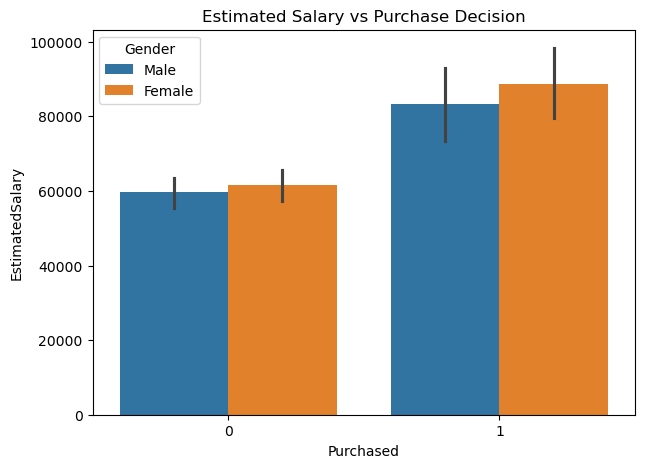

In [77]:
plt.figure(figsize=(7,5))

sns.barplot(
    data=social_network,
    x="Purchased",
    y="EstimatedSalary",
    hue="Gender"
)

plt.title("Estimated Salary vs Purchase Decision")
plt.show()


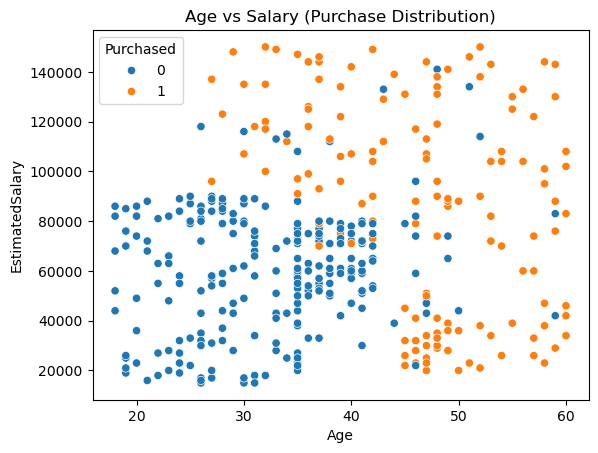

In [78]:
sns.scatterplot(
    data=social_network,
    x="Age",
    y="EstimatedSalary",
    hue="Purchased"
)
plt.title("Age vs Salary (Purchase Distribution)")
plt.show()


In [79]:
X = social_network.drop("Purchased",axis=1)
y = social_network["Purchased"]

X["Gender"]=X["Gender"].map({"Female":1,"Male":0})

In [80]:
#Train AndTest Data
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)

In [81]:
#Standardization
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
model = LogisticRegression(max_iter = 1000,random_state=42)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [83]:
y_pred = model.predict(X_test)

In [84]:
#Evaluation
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("accuracy:", accuracy_score(y_test,y_pred)*100,"%")
print("presicion:", precision_score(y_test,y_pred)*100,"%")
print(recall_score(y_test,y_pred)*100,"%")
print(f1_score(y_test,y_pred)*100,"%")

[[61  2]
 [10 27]]
accuracy: 88.0 %
presicion: 93.10344827586206 %
72.97297297297297 %
81.81818181818183 %


In [85]:
#cross validation for hyperparameter tuning using gridsearchcv()
from sklearn.model_selection import GridSearchCV

logistic_regressorCV = LogisticRegression(max_iter=1000, random_state=42)
parameters = {
    'penalty': ['l2'],
    'C': [1, 10, 100, 1000],
    'solver': ['lbfgs']
}

logistic_crossvalidation = GridSearchCV(
                           estimator =logistic_regressorCV ,  
                           param_grid = parameters,
                           scoring = 'precision',
                           cv = 5

)

logistic_crossvalidation.fit(X_train,y_train)
y_pred=logistic_crossvalidation.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"presicion: {precision_score(y_test,y_pred):.2f}")


print(classification_report(y_test, y_pred))
res=pd.DataFrame(logistic_crossvalidation.cv_results_)
print(res["mean_test_score"])

print(logistic_crossvalidation.best_params_)

Accuracy: 0.88
presicion: 0.93
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100

0    0.817143
1    0.817143
2    0.817143
3    0.817143
Name: mean_test_score, dtype: float64
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
